In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [165]:
file = pd.read_csv(r'diabetes.csv')

In [166]:
file.head() #just checking the head and if we have the data in right format

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [175]:
# Since, instead of having Nan values we have 0s, we cannot make all zeros as Nan. Attributes such as Pregnancies,
# and outcomes can have a 0 value. 
# Zero Values in :

print("zero values in Glucose:")
print( file.loc[file['Glucose'] == 0, 'Glucose'].count() )

print("Zero values in BP :")
print(file.loc[file['BloodPressure'] == 0, 'BloodPressure'].count())

print("Zero values in Skin thickness:")
print(file.loc[file['SkinThickness'] == 0, 'SkinThickness'].count())

print("Zero values in Insulin: ")
print(file.loc[file['Insulin'] == 0, 'Insulin'].count())

print("Zero values in BMI :")
print( file.loc[file['BMI'] == 0, 'BMI'].count() )

print("Zero values in DiabetesPedigreeFucntion:")
print( file.loc[file['DiabetesPedigreeFunction'] == 0, 'DiabetesPedigreeFunction'].count())

print("Zero values in Age : ")
print( file.loc[file['Age'] == 0, 'Age'].count())

zero values in Glucose:
5
Zero values in BP :
35
Zero values in Skin thickness:
227
Zero values in Insulin: 
374
Zero values in BMI :
11
Zero values in DiabetesPedigreeFucntion:
0
Zero values in Age : 
0


In [178]:
columns_nan = file.columns[1:6]
for i in columns_nan:
    
    file.loc[file[i ]== 0, i] = np.nan

#Replacing 0 form numerical values except Pregnancy, DiabetesPedigreeFunction, Age and Outcome

In [179]:
file 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


First we will perform basic statistical analysis on our data. Then we will replace the Nan values with the mean value and compare

In [56]:
file.describe() #just getting to know about the various fields and what are the mean, std values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
file.corr() #finding the correlation among independent attributes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


A few observation from the correlation :
    1. As can be expected, asthe age of individuals increases, the amount of insulin that they can produce and 
       their skin thickness decreases. 
    2. Pregnancy and age have a positive correlation but with more pregnancy, the amount of insulin that the body 
       can produce, goes down. 
    3. Age, pregnancy and glucose have a positive correlation that is, the aount of glucose generated increases 
      (as the insulin production capacity decreases), thereby creating a risk of diabetes in advanced years. 
    4. Skin thickness plays essentially insignificant role in causing diabetes although it does decreases in cases of diabetes.
    

Now, replacing the nan with mean value to compare results 

In [58]:
file.fillna(file.mean()) #fill the missing values with the mean of the attribute

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [59]:
file.describe() #looking at data description after filling the Nan Values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
file.corr() #finding correlation among various independent attributes 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


we see a significant change in the correlation after replacing the nans with mean value. Checking for outliers now. 


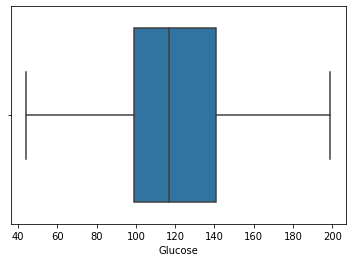

In [61]:
sns.boxplot(x=file['Glucose']) #checking for outliers in Glucose data 


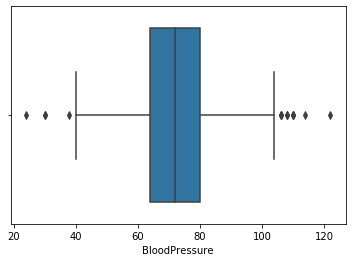

In [62]:
sns.boxplot(x=file['BloodPressure']) #checking for outliers in Blood Pressure data
#we see some outliers here 

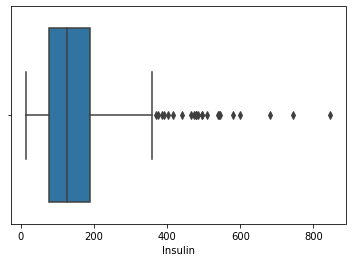

In [63]:
sns.boxplot(x=file['Insulin']) #checking for outliers in Insulin data 
#We see signifacnt number of outliers in this boxplot

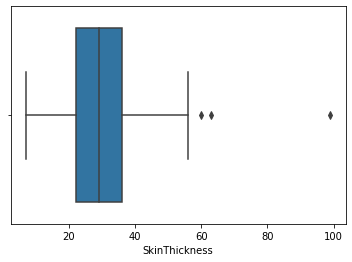

In [64]:
sns.boxplot(x=file['SkinThickness']) #very few outliers for skin thickness 

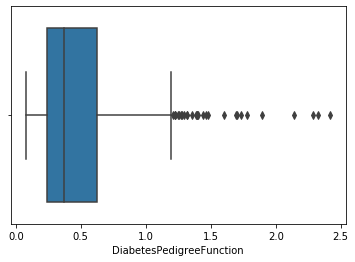

In [65]:
sns.boxplot(x=file['DiabetesPedigreeFunction']) #here also we see some significant number of outliers

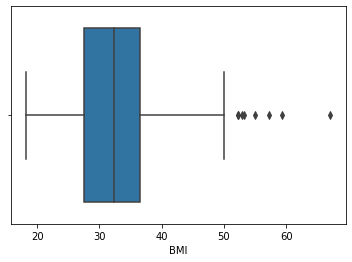

In [66]:
sns.boxplot(x=file['BMI']) 

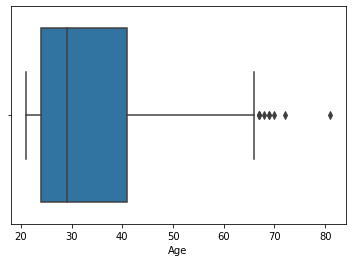

In [68]:
sns.boxplot(x=file['Age']) 

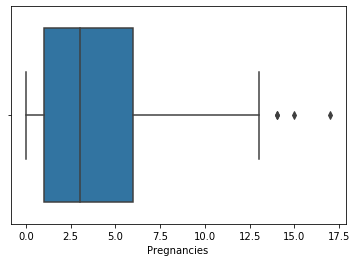

In [69]:
sns.boxplot(x=file['Pregnancies']) 

Performing a pair plot analysis for a quick overview of relation between the independent attributes 

C:\Users\Ashu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ashu\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


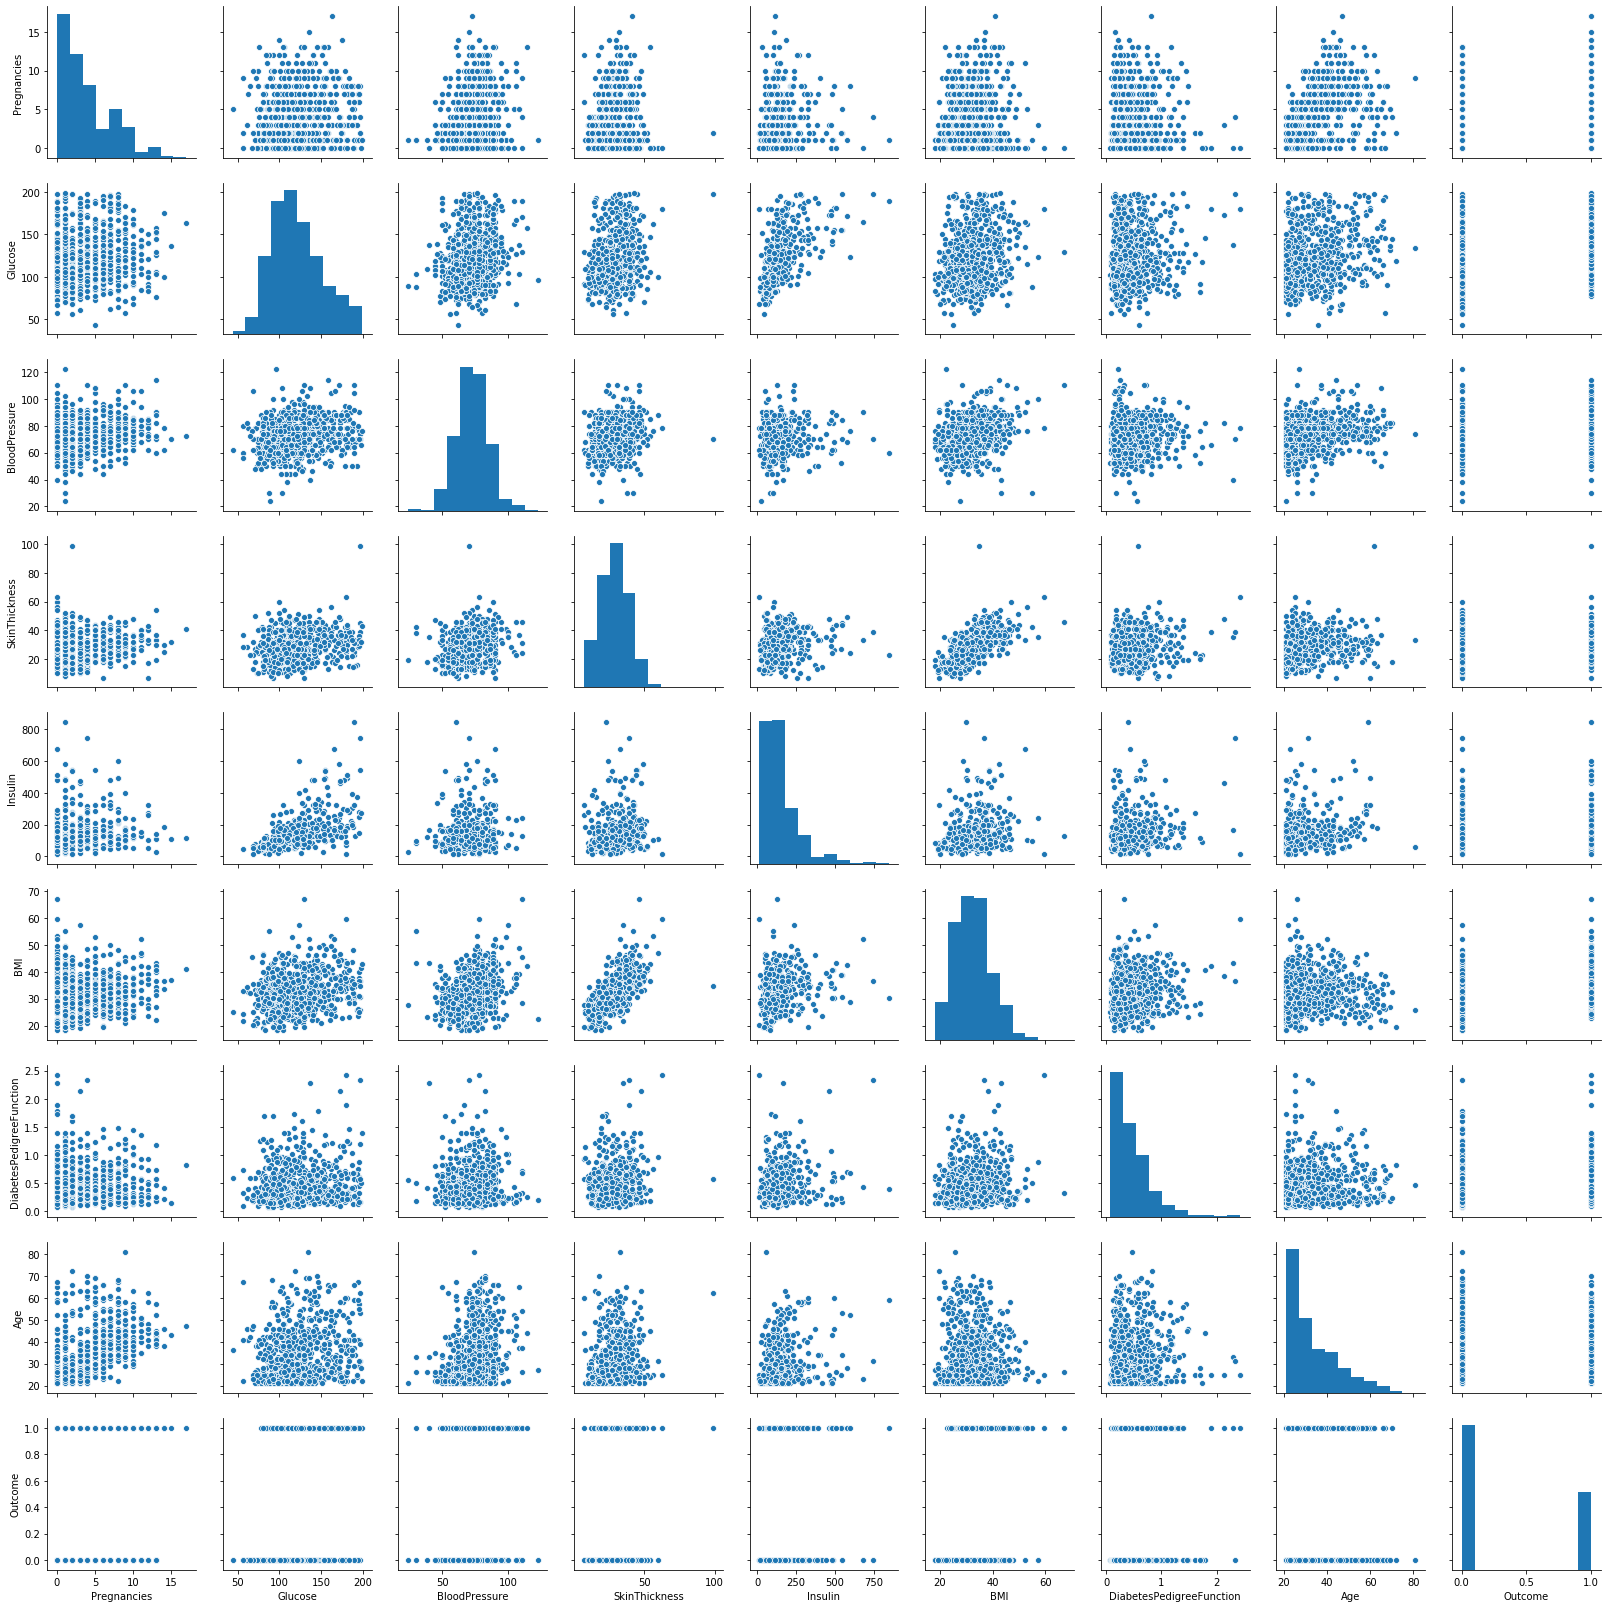

In [70]:
sns.pairplot(file)

Bi-variant analysis for our attributes  

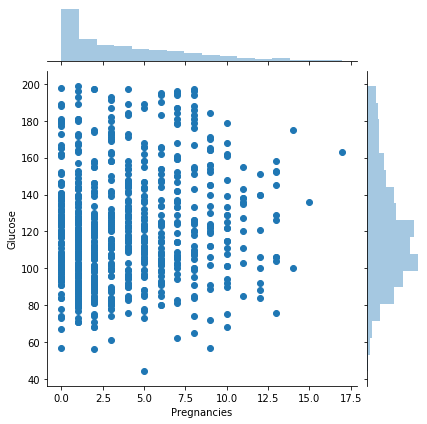

In [71]:
sns.jointplot(x="Pregnancies", y="Glucose", data=file); #between Glucose and Pregnancies 

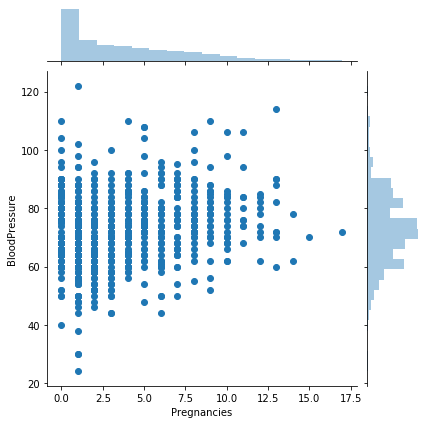

In [72]:
sns.jointplot(x="Pregnancies", y="BloodPressure", data=file);

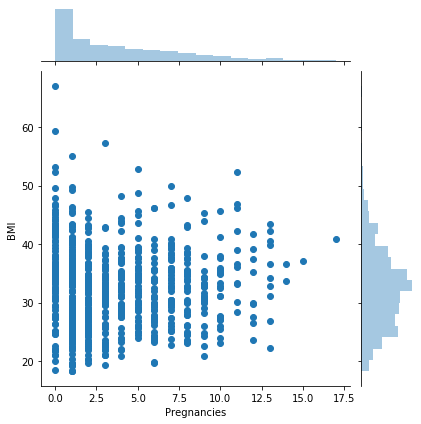

In [73]:
sns.jointplot( x = "Pregnancies", y ="BMI", data = file);

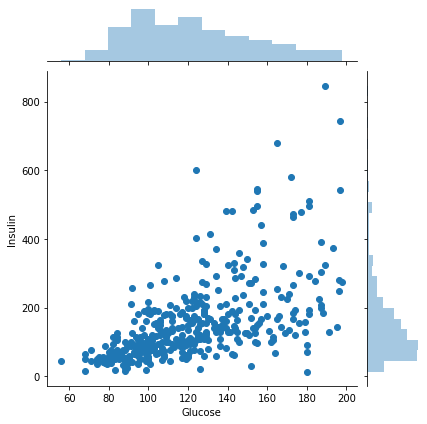

In [74]:
sns.jointplot(x="Glucose", y="Insulin", data=file); #between glucose and insuline

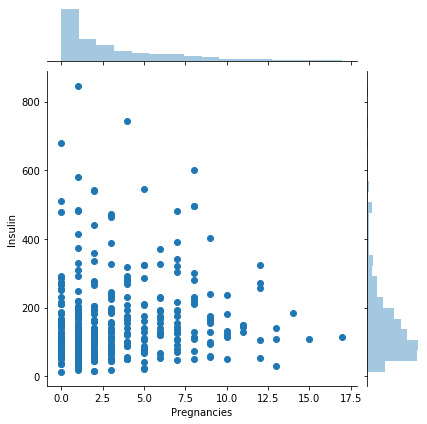

In [75]:
sns.jointplot(x="Pregnancies", y="Insulin", data=file); #between insulin content and pregnancies 

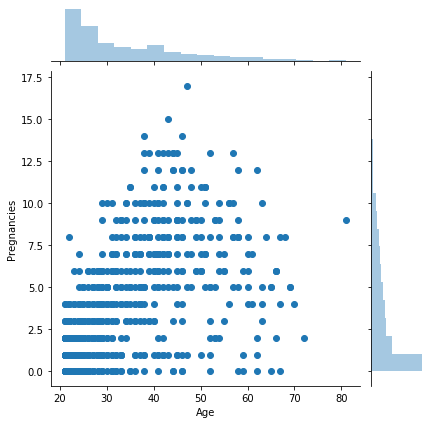

In [76]:
sns.jointplot(x="Age", y="Pregnancies", data=file);

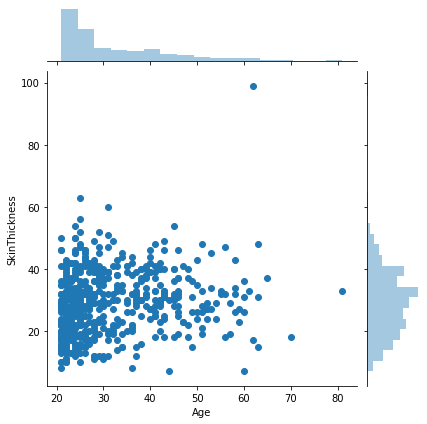

In [77]:
sns.jointplot(x="Age", y="SkinThickness", data=file);

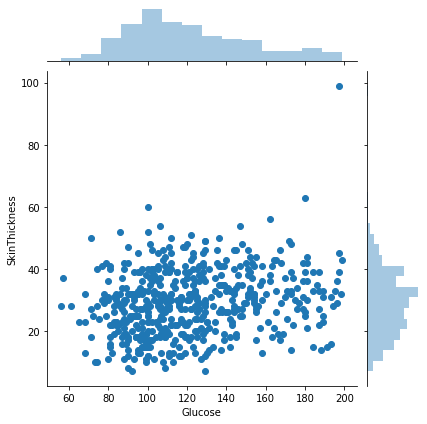

In [78]:
sns.jointplot(x="Glucose", y="SkinThickness", data=file);

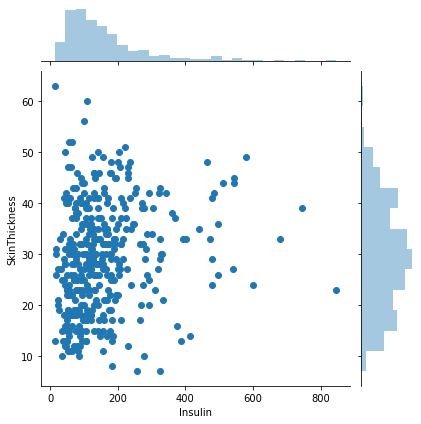

In [79]:
sns.jointplot(x="Insulin", y="SkinThickness", data=file);

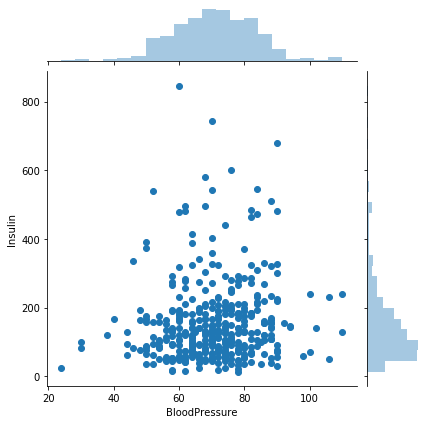

In [80]:
sns.jointplot(x="BloodPressure", y="Insulin", data=file);

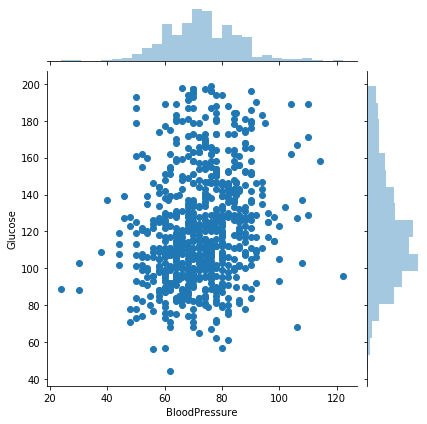

In [81]:
sns.jointplot(x="BloodPressure", y="Glucose", data=file);

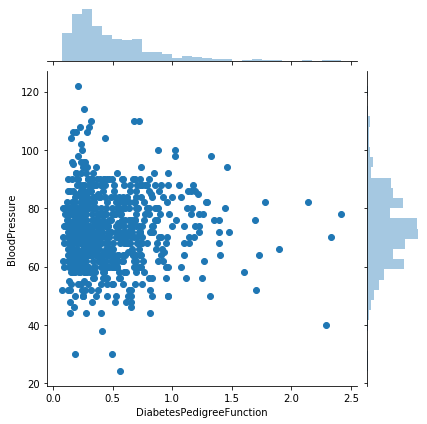

In [82]:
sns.jointplot(x = "DiabetesPedigreeFunction", y = "BloodPressure", data = file );

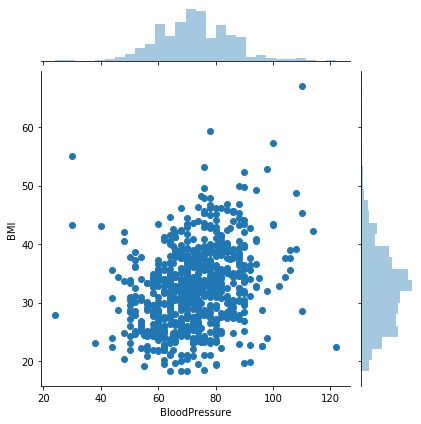

In [83]:
sns.jointplot(x= "BloodPressure", y="BMI", data = file)

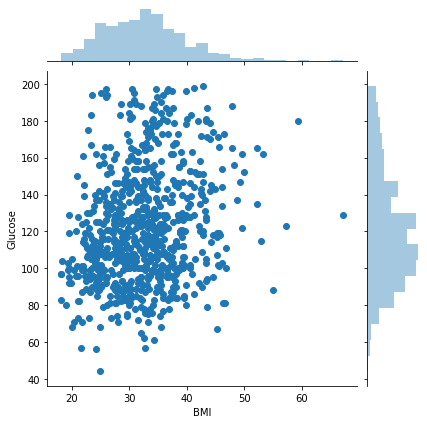

In [84]:
sns.jointplot(x= "BMI", y="Glucose", data = file)

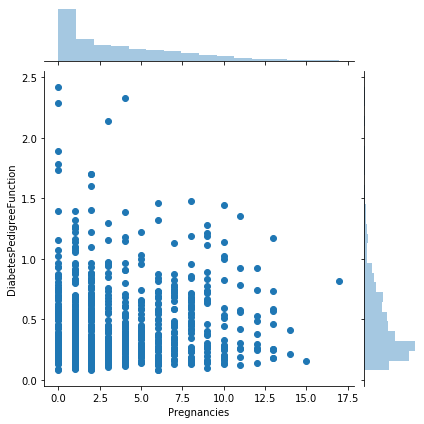

In [85]:
sns.jointplot(x= "Pregnancies", y="DiabetesPedigreeFunction", data = file)

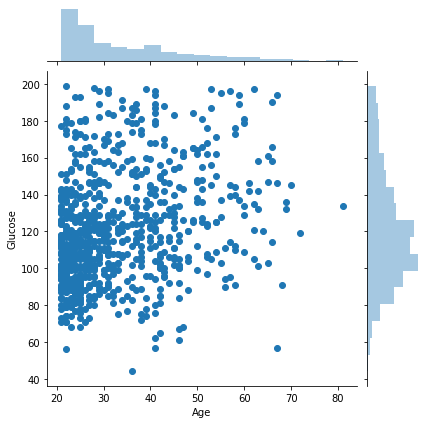

In [86]:
sns.jointplot(x= "Age", y="Glucose", data = file)

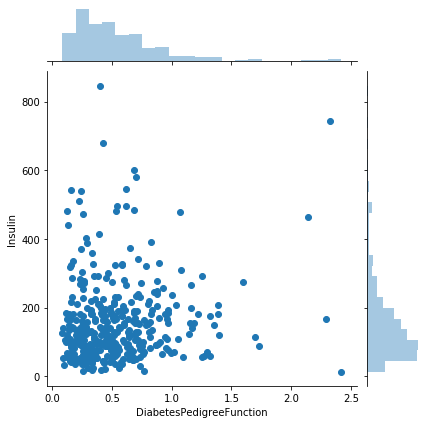

In [87]:
sns.jointplot(x= "DiabetesPedigreeFunction", y="Insulin", data = file)

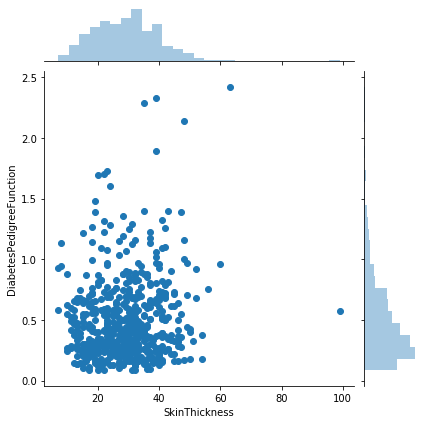

In [88]:
sns.jointplot(x= "SkinThickness", y="DiabetesPedigreeFunction", data = file)

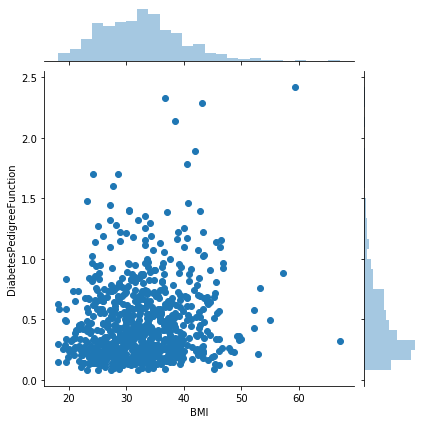

In [89]:
sns.jointplot(x= "BMI", y="DiabetesPedigreeFunction", data = file)

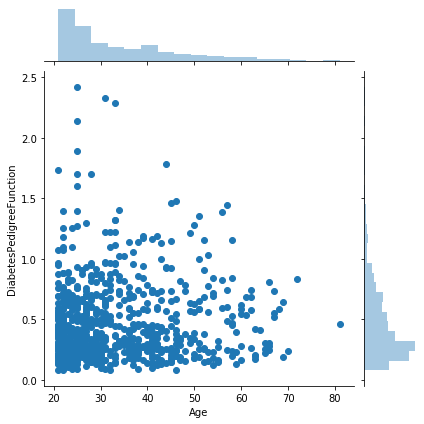

In [90]:
sns.jointplot(x= "Age", y="DiabetesPedigreeFunction", data = file)

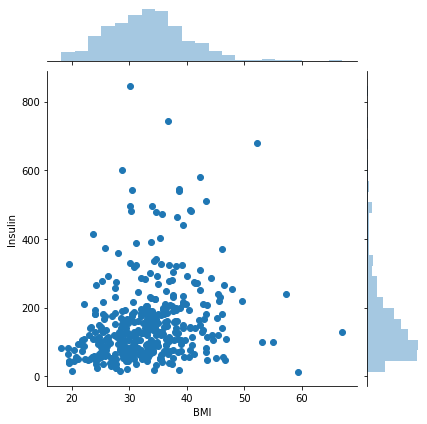

In [91]:
sns.jointplot(x= "BMI", y="Insulin", data = file)

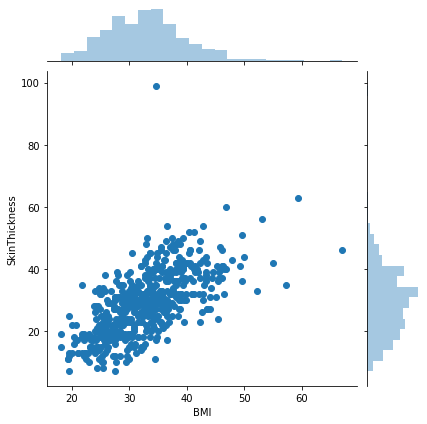

In [92]:
sns.jointplot(x= "BMI", y="SkinThickness", data = file)

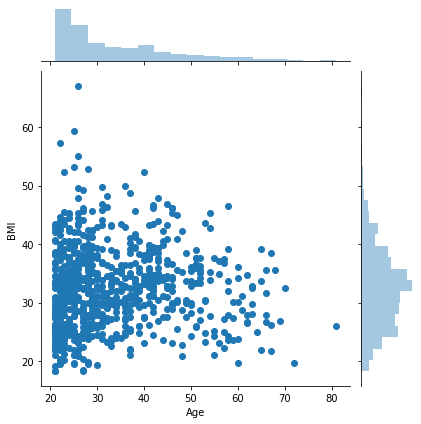

In [93]:
sns.jointplot(x= "Age", y="BMI", data = file)

Box Plot analysis: 

From our analysis of the outliers, we can say that the following attributes have less error values - 

1. Age

2. BloodPressure

3. Glucose

4. Pregnancies

5. skin thickness

Analysis of all attributes :



1. Insulin:
Given the high number of missing values in 'Insulin', it would be in best interest to not take into account for our analysis.

2. Blood Pressure: 

In [219]:
print("Cases of normal BP :")
print( file.loc[file['BloodPressure']< 80 , 'BloodPressure' ].count() )
print("Cases with normal BP who have Diabetes: ")
print( file.loc[(file['BloodPressure']< 80) & (file['Outcome'] == 1) , 'BloodPressure' ].count())

print("Cases with signs of Pre-Hypertension:")
print( file.loc[(file['BloodPressure'] >= 80) & (file['BloodPressure'] <= 89), 'BloodPressure'].count() )
print("Cases with Pre-Hypertension and Diabetes both : ")
print( file.loc[(file['BloodPressure'] >= 80) & (file['BloodPressure'] <= 89) & (file['Outcome'] == 1), 'BloodPressure'].count() )

print("Cases with signs of High BP:")
print( file.loc[file['BloodPressure'] >= 89, 'BloodPressure'].count() )
print("cases of High BP and diabetes both :")
print( file.loc[(file['BloodPressure'] >= 89) & (file['Outcome'] == 1), 'BloodPressure'].count() )

Cases of normal BP :
528
Cases with normal BP who have Diabetes: 
162
Cases with signs of Pre-Hypertension:
145
Cases with Pre-Hypertension and Diabetes both : 
61
Cases with signs of High BP:
60
cases of High BP and diabetes both :
29


3. Glucose :

In [220]:
print("Patients with High (>140 mg/dL) blood sugar :")
print( file.loc[file['Glucose'] > 140,  'Glucose'].count() )
print("Patients with High blood sugar and diabetes: ")
print( file.loc[(file['Glucose'] > 140) & (file['Outcome'] == 1 ),  'Glucose'].count() )

print("Patients with normal( >72 and <140 ) blood sugar :")
print( file.loc[(file['Glucose'] > 72) & (file['Glucose'] < 140), 'Glucose'].count())
print("Patients with normal blood sugar but with diabetes :")
print( file.loc[(file['Glucose'] > 72) & (file['Glucose'] < 140) & (file['Outcome'] == 1 ), 'Glucose'].count())

print("Patients with low blood sugar (<72) :")
print( file.loc[file['Glucose'] < 72, 'Glucose' ].count())
print("Patients with low blood sugar and diabetes: ")
print( file.loc[(file['Glucose'] < 72) & (file['Outcome'] == 1 ) , 'Glucose' ].count())

Patients with High (>140 mg/dL) blood sugar :
192
Patients with High blood sugar and diabetes: 
132
Patients with normal( >72 and <140 ) blood sugar :
550
Patients with normal blood sugar but with diabetes :
131
Patients with low blood sugar (<72) :
15
Patients with low blood sugar and diabetes: 
0


4. BMI 

In [222]:
print("Underweight:")
print( file.loc[file['BMI'] < 18.5,'BMI'].count())
print("Patients that underweight and diabetic: ")
print( file.loc[(file['BMI'] < 18.5) & (file['Outcome'] ==1) ,'BMI'].count())

print("Normal weight:")
print( file.loc[(file['BMI'] > 18.5) & (file['BMI'] <25),'BMI'].count())
print("Patients with normal weight and diabetes:  ")
print( file.loc[(file['BMI'] > 18.5) & (file['BMI'] <25) & (file['Outcome'] == 1 ),'BMI'].count())

print("Overweight:")
print( file.loc[(file['BMI'] > 25) & (file['BMI'] <30),'BMI'].count())
print("Overweight patients that are diabetic : ")
print( file.loc[(file['BMI'] > 25) & (file['BMI'] <30) & (file['Outcome'] == 1 ) ,'BMI'].count())

print("Obese:")
print( file.loc[file['BMI'] > 30, 'BMI'].count())
print("Obese patients that are diabetic :")
print( file.loc[(file['BMI'] > 30) & (file['Outcome'] == 1), 'BMI'].count())

Underweight:
4
Patients that underweight and diabetic: 
0
Normal weight:
102
Patients with normal weight and diabetes:  
7
Overweight:
173
Overweight patients that are diabetic : 
40
Obese:
465
Obese patients that are diabetic :
215


5. Skin Thickness

Since 227 people have reported 0mm skin thickness, this does not seem to be a factor to be accounted for in our analysis. 

6. Diabetes Pedigree Functions:  

From boxplot analysis, we see a large number of outliers which can lead to false predictions. Therefore, it does not seem to be
a factor to be accounted for in our analysis. 

7. Age : 

In [229]:
print("Median age in our dataset : " , file['Age'].median() )
print("Number of 29 year olds : ")
print(file.loc[file['Age'] == 25, 'Age'].count())
print("Number of 29 year olds with diabetes : ")
print( file.loc[(file['Age'] == 25 ) & (file['Outcome'] == 1 ), 'Age'].count())

Median age in our dataset :  29.0
Number of 29 year olds : 
48
Number of 29 year olds with diabetes : 
14


Age seems to not be a major factor that is causing diabetes in our patients. From the scatter plot, It seems to be giving expected results for the age groups. (29% for 29year olds)
    

8. Outcome : 

In [213]:
count_one = file.loc[file['Outcome'] == 1, 'Outcome'].count()
percentage_one = ( count_one / 768 ) * 100
print("Percentage of patients with diabetes : {:.2f} ".format(percentage_one))

Percentage of patients with diabetes : 34.90 


Values that can be good predictors are as follows: 
    1. Blood Pressure
    2. BMI 
    3. Glucose 

< End of notebook >